# **Foodhub Transaction Analysis**

## **1. Introduction**

- **Name**: Thaliban Allaam
- **Batch**: HCK - 025

**Objective**: Analyze Foodhub's transaction data to get a comprehensive understanding of the business.

**Dashboard:** https://public.tableau.com/views/M1_ThalibanAllaam/Visualisasi?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## **2. Problem Identification**

### **Backgorund**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The dataset used in this project contains the transaction data of Foodhub. From the dataset, we're trying to analyze the data and try to find patterns and find aspects that we can improve in the future.

## **3. Data Loading**

The dataset to be analyzed is titled "NYC Restaurants Data - Food Ordering and Delivery." This dataset is sourced from Kaggle. It features data related to ordering activities that take place in New York City. The dataset includes information such as customer ID, restaurant name, restaurant type, price per order, preparation time, delivery time, and ratings.

**Source**: https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset/code

### **Initialization**

Initialize libraries needed.

In [91]:
'''Data Processing'''
import pandas as pd 
from scipy import stats 

'''Data Visualization'''
import matplotlib.pyplot as plt 
import seaborn as sns

Load the dataset using `read_csv()` method from pandas and saving it as a `df` dataframe.

In [92]:
df = pd.read_csv('food_order.csv')

### **Dataframe**

Showing the dataset overview.

In [93]:
df.head(10) 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


In [94]:
df.describe() 

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


**Key Takeaways:**

- The `average price` / cost per order is `$16.5` with a range of `$4.5` to `$35.4`.
- The `average prep time` time is `27.4 minutes` with a range of `20 to 35 minutes`.
- The `average delivery time` time is `24.2 minutes` with a range of `15 to 33 minutes`.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Key Takeaways:**

- The dataset contains `1898 entries` with 9 different columns/features.
- The dataset consists of `5 numerical` and `4 categorical` data.
- The are no missing values in the dataset.

## **4. Data Cleaning**

#### **Duplicate**

Finding duplicated data using `duplicated()` method and then count the total amount of duplicated data using `sum()` method.

In [96]:
df.duplicated().sum()

0

There are no duplicated data in the dataset.

#### **Feature Checking**

Using the `unique()` method to view the data in each column.

In [97]:
df['order_id'].unique()

array([1477147, 1477685, 1477070, ..., 1477819, 1477513, 1478056],
      dtype=int64)

In [98]:
df['customer_id'].unique()

array([337525, 358141,  66393, ...,  97838, 292602, 397537], dtype=int64)

In [99]:
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [100]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [101]:
df['cost_of_the_order'].unique()

array([30.75, 12.08, 12.23, 29.2 , 11.59, 25.22,  6.07,  5.97, 16.44,
        7.18,  5.92,  8.1 , 24.3 , 11.3 , 12.13, 16.2 , 16.98, 33.03,
       14.12, 24.2 , 15.91, 29.1 ,  8.92, 15.86, 21.88, 14.02,  9.17,
       12.18, 31.33, 29.05,  8.39,  9.12, 15.47, 16.01, 29.83, 19.89,
       19.35, 33.22, 24.25, 22.75,  6.74, 13.78, 16.93, 29.39, 20.23,
       14.6 ,  6.79, 31.38,  8.34, 12.46, 14.55, 32.93,  8.  , 13.05,
        5.67, 29.29, 16.15, 13.34,  9.75,  6.69,  4.75, 12.56, 21.2 ,
       19.31, 16.3 , 25.27, 14.79,  5.72,  9.22, 16.39, 17.03, 21.83,
       31.29, 11.83, 22.26, 20.47, 15.81, 22.36,  8.68, 12.9 , 29.15,
        7.86, 16.1 , 12.95, 11.69, 12.32, 14.99, 10.38,  9.65,  5.77,
        9.56, 29.34, 11.16, 14.07, 22.8 , 15.23, 16.49,  8.83, 16.25,
       16.83, 10.24, 19.4 , 13.97, 13.  ,  8.49, 20.18, 19.59, 16.11,
       12.27, 13.39,  9.02, 15.33, 31.43, 29.35, 15.28,  9.6 ,  8.88,
       15.96,  8.05,  8.54,  7.23, 19.69,  9.27,  8.97, 11.64, 13.15,
        9.41,  9.07,

In [102]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [103]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [104]:
df['food_preparation_time'].unique()

array([25, 23, 20, 28, 33, 21, 29, 34, 24, 30, 35, 32, 31, 27, 22, 26],
      dtype=int64)

In [105]:
df['delivery_time'].unique()

array([20, 23, 28, 15, 24, 21, 30, 26, 22, 17, 25, 16, 29, 27, 18, 31, 32,
       19, 33], dtype=int64)

#### **Conclusion**

- Regularize the string in `restaurant_name`.
- Handle the data with `not given` in `rating`.
- Change `rating` data type.

### **Regularize `restaurant_name`**

Using `str.replace()` method to regularize the string.

In [106]:
df['restaurant_name'] = df['restaurant_name'].str.replace(r'[^\x00-\x7F]+', '',regex=True)  #Remove non-ASCII characters
df['restaurant_name'] = df['restaurant_name'].str.replace('_', '') #Remove underscores

In [107]:
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill', 'Big Wong Restaurant ',
       'Empanada Mama (closed)', 'Pylos', "Lucky's Famous Burgers",
       'Shake Shack', 'Sushi of Gari', 'RedFarm Hudson',
       'Blue Ribbon Sushi', 'Five Guys Burgers and Fries', 'Tortaria',
       'Cafe Mogador', 'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Brooklyn', 'Nobu N

According to the output, the data has been regularized successfully.

### **Handle Data with `not given` entries**

In [108]:
df[(df['rating'] == 'Not given')].count()

order_id                 736
customer_id              736
restaurant_name          736
cuisine_type             736
cost_of_the_order        736
day_of_the_week          736
rating                   736
food_preparation_time    736
delivery_time            736
dtype: int64

In [109]:
df['rating'].value_counts() #Menghitung jumlah frekuensi muncul tiap rating

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

**Options:**

Fill `not given` with **mode (5)**:
- (+) Filling with mode will not affect the data distribution significantly.
- (-) May cause an unwanted bias.
- (-) The mode (5) is an extreme value and may cause an inaccurate predictions.

Fill `not given` with **median (4)**:
- (+) The median (4) is not an extreme value which will less likely cause a bias.
- (-) Filling with median may affect the data distribution significantly.

**Drop data**:
- (+) Data authenticity is maintained.
- (-) Potentially losing valuable data.

**Final Decision:**

The final decision is to drop the data since we want to maintain the authenticity of the data so that the analysis results would represent the customers actual preferences. After the data is dropped, we will still have more than 1000 entries which is considered sufficient to use for the analysis.

In [110]:
df_new = df.drop(df[df['rating'] == 'Not given'].index) 

df_new

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


### **Change Data Type**

In [111]:
df_new['rating'] = df_new['rating'].astype(float)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 90.8+ KB


Based on the output, the data type for `rating` column has changed.

## **5. Analysis**

After cleaning the data, the dataset is ready to use for analysis.

Preview the cleaned dataset for analysis.

In [112]:
df_new

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3.0,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5.0,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19


#### **1. `delivery_time` and `rating` correlation.**

To find the relation within the two features, we will do statistical inference. We will use two methods, `correlation analysis` and `hypothesis testing`.

We will use `Spearman's method` due to the following reasons:
- Both features are numerical data.
- `rating` doesn't follow a normal distribution pattern (skewed).

**Hypothesis:**
- **H0**: There are no correlations between `delivery_time` and `rating`.
- **H1**: There's a correlation between `delivery_time` and `rating`.

Visualizing a `scatter chart`, the x axis represents `rating` while y axis represents `delivery_time`.

Text(0.5, 1.0, 'Delivery Time vs Rating')

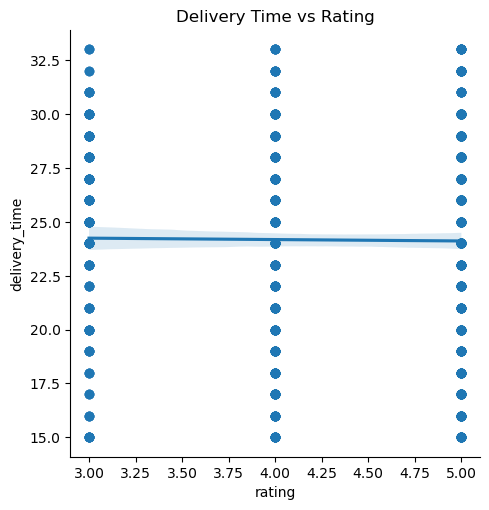

In [113]:
sns.lmplot(data= df_new, x='rating', y='delivery_time')
plt.title('Delivery Time vs Rating') 

**Key Takeaways:**

- The regression line shown in the plot shows a line that is tilted down. This indicates that there is a `negative correlation` between the two features.

**Calculation of *rho-correlation* and *p-value*.**

In [114]:
corr_rho, pval_k = stats.spearmanr(df_new['rating'], df_new['delivery_time']) 
print(f"rho-correlation: {corr_rho}, p-value: {pval_k}")

rho-correlation: 0.0007021871445865505, p-value: 0.9809240135302416


**Conclusion:**
- Rho-correlation value is approaching zero which indicates that the correlation between the two features is very small or even close to none.
- The p-value is above the predetermined critical value (0.05) which means that H0 is accepted. H0 states that there are no correlation between the two features.

### **`Delivery Time`**

According to the statistical inference between `rating` and `delivery_time`, we concluded that there are no correlations between the two. For that reason, we must explore the two features even further to find any findings that would give us additional insights.

**Descriptive Analysis on `delivery_time`**

In [115]:
# Max & Min
print(f'Max delivery time: {df_new['delivery_time'].max():.0f}')
print(f'Min delivery time: {df_new['delivery_time'].min():.0f}')

# Rata - Rata
print(f'AVG delivery time: {df_new['delivery_time'].mean():.0f}')

# Median
print(f'Median delivery time: {df_new['delivery_time'].median():.0f}')

# Modus
print(f'Modus delivery time: {df_new['delivery_time'].mode().values[0]:.0f}')

#Standar Deviasi
std = df_new['delivery_time'].std()
print(f'Standar Deviasi: {std:.2f}')

#Skewness
print(f"Skewness: {df_new['delivery_time'].skew():.2f}")

#Kurtosis
print(f"Kurtosis: {df_new['delivery_time'].kurtosis():.2f}")

Max delivery time: 33
Min delivery time: 15
AVG delivery time: 24
Median delivery time: 25
Modus delivery time: 24
Standar Deviasi: 4.93
Skewness: -0.24
Kurtosis: -0.97


**Plotting `delivery_time`**

<Axes: >

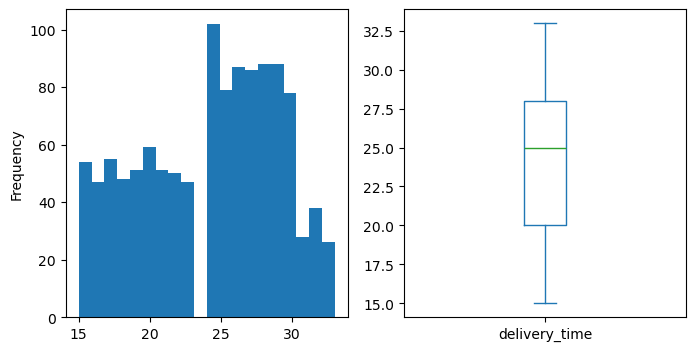

In [116]:
fig, ax = plt.subplots(ncols=2,figsize=(8,4))

df_new['delivery_time'].plot(kind='hist',bins=20,ax=ax[0]) #Plot histogram
df_new['delivery_time'].plot(kind='box',ax=ax[1]) #Plot Box and Whisker

**Key Takeaways:**
- The range of value for `delivery_time` is `15 to 33 minutes`.
- The box plot shows that there are no outliers.
- The skewness value (-0.24) falls between -0.5 and 0.5 which indicates a distribution that is `approximately symmetric`.
- The kurtosis value (-0.97) is below 0 which indicates that the data distribution is `platykurtic`.

#### **1. `delivery_time` based on `cuisinie_type`**

In [117]:
df_a = df_new[['cuisine_type', 'delivery_time']] 
df_a

,cuisine_type,delivery_time
2,Mexican,28
3,American,15
4,American,24
5,Indian,24
7,Mediterranean,30
...,...,...
1889,Chinese,30
1890,Japanese,22
1893,Mexican,17
1894,American,19


In [118]:
df_a['cuisine_type'].unique()

array(['Mexican', 'American', 'Indian', 'Mediterranean', 'Chinese',
       'Japanese', 'Middle Eastern', 'Italian', 'Thai', 'Southern',
       'Spanish', 'French', 'Korean', 'Vietnamese'], dtype=object)

Based on the output above, we have 14 unique values in `cuisine_type`.

**Calculating the average `delivery_time`for each value.**

In [ ]:
mean_delivery_time = df_a.groupby(df_a['cuisine_type']).mean()
mean_delivery_time

,delivery_time
cuisine_type,
American,24.396739
Chinese,23.496241
French,25.100000
Indian,23.300000
Italian,25.209302
Japanese,23.743590
Korean,21.111111
Mediterranean,23.187500
Mexican,24.770833


In [ ]:
print(f'AVG delivery time: {mean_delivery_time['delivery_time'].mean():.2f} menit')

AVG delivery time: 23.87 menit


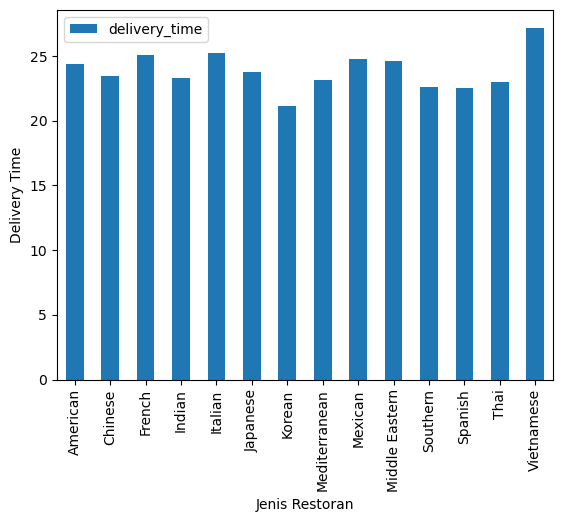

In [ ]:
mean_delivery_time.plot(kind='bar')
plt.xlabel('Jenis Restoran') 
plt.ylabel('Delivery Time') 
plt.show()

**Conclusion:**
- There are 14 unique values in `cuisine_type`.
- The `average delivery time` is `23.87 minutes`.
- `Vietnamese` has the `longest average delivery time` (27.2 minutes) whereas `Korea` has the `fastest average delivery time` (21.1 minutes).

#### **2. Amount of orders based on `cuisine_type`**

In [ ]:
df_b = df_new[['cuisine_type', 'order_id']] 
df_b

,cuisine_type,order_id
2,Mexican,1477070
3,American,1477334
4,American,1478249
5,Indian,1477224
7,Mediterranean,1477859
...,...,...
1889,Chinese,1478190
1890,Japanese,1477316
1893,Mexican,1476701
1894,American,1477421


In [ ]:
count_order = df_b.groupby(df_b['cuisine_type']).count()
count_order

,order_id
cuisine_type,
American,368
Chinese,133
French,10
Indian,50
Italian,172
Japanese,273
Korean,9
Mediterranean,32
Mexican,48


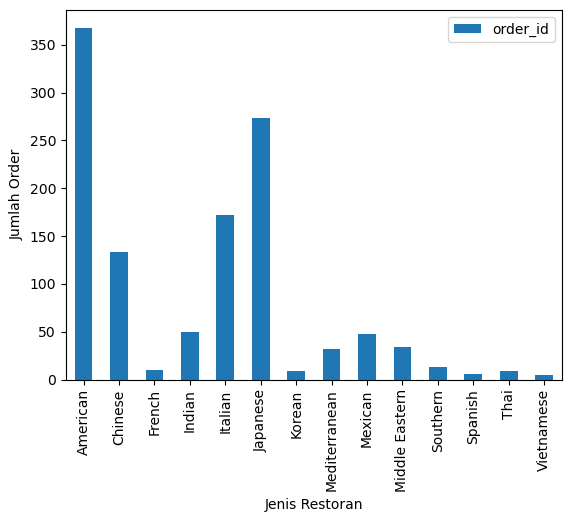

In [ ]:
count_order.plot(kind='bar')
plt.xlabel('Jenis Restoran') 
plt.ylabel('Jumlah Order') 
plt.show() 

**Key Takeaways:**
- Based on the bar chart above, the top `cuisine_type` based on amount of orders are `American`, `Japanese`, `Chinese`, and `Italian`. All of them has an order amount above 100 monthly.

**Comparing amount of orders and average delivery time.**

In [ ]:
type_compare = pd.concat([count_order, mean_delivery_time], axis=1)
type_compare

,order_id,delivery_time
cuisine_type,,
American,368,24.396739
Chinese,133,23.496241
French,10,25.100000
Indian,50,23.300000
Italian,172,25.209302
Japanese,273,23.743590
Korean,9,21.111111
Mediterranean,32,23.187500
Mexican,48,24.770833


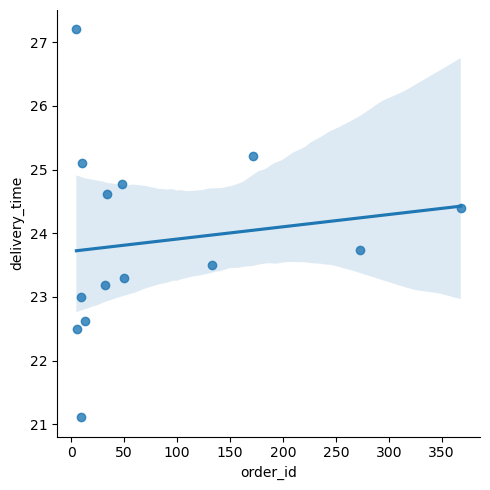

In [ ]:
sns.lmplot(data=type_compare,x='order_id', y='delivery_time')

**Key Takeaways:**
- The regression line above shows a line with a slightly tilt upwards. This indicates a `positive correlation` between the two features.

Next, we will do a hypothesis testing and correlation analysis using` Kendall's method` due to the following reasons.
- Comparison between categorical and numerical data.

**Hypothesis:**
- **H0**: There are no correlations between (count `order_id`) and `delivery_time`
- **H1**: There's a correlation between (count `order_id`) and `delivery_time`

**Calculation**

In [127]:
corr_tau, pval_k = stats.kendalltau(type_compare['order_id'], type_compare['delivery_time']) 
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: 0.27, p-value: 0.18822417619285137


**Conclusion:**
- The top 4 `cuisine_type` are `American`, `Japanese`, `Chinese`, and `Italian` with a total of 368 orders monthly.
- The correlation value (0.27) indicates a positive correlation between the two features.
- Based on the hypothesis testing, the p-value (0.19) is smaller than the critical value (0.05) which means that H0 is accepted.

#### **3. `food_preparation_time` vs `delivery_time`**

**Mencari korelasi antara waktu untuk *prep* dengan waktu *delivery*.**

In [ ]:
df_c = df_new[['cuisine_type', 'food_preparation_time', 'delivery_time']]
df_c 

,cuisine_type,food_preparation_time,delivery_time
2,Mexican,23,28
3,American,25,15
4,American,25,24
5,Indian,20,24
7,Mediterranean,33,30
...,...,...,...
1889,Chinese,33,30
1890,Japanese,20,22
1893,Mexican,31,17
1894,American,31,19


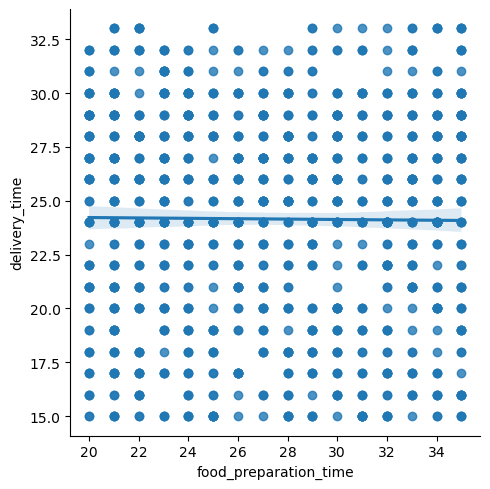

In [129]:
sns.lmplot(data=df_c,x='food_preparation_time', y='delivery_time')

**Key Takeaways:**
- The regression line show a line that is slightly tilted downwards. This indicates a negative correlation between `food_preparation_time` and `delivery_time`.

Metode yang akan digunakan untuk uji hipotesis adalah **metode Kendall** dengan alasan berikut:
- Tujuannya adalah untuk mencari korelasi
- Kedua variabel merupakan data numerikal

Next, we will do a hypothesis testing and correlation analysis using Spearman's method due to the following reasons.
- Both features are numerical data.
- Spearman doesn't assume a specific distribution.

**Hypothesis:**
- **H0**: There is no correlation between **`food_preparation_time`** and **`delivery_time`**
- **H1**: There's a correlation between **`food_preparation_time`** and **`delivery_time`**

In [150]:
corr_rho, pval_k = stats.spearmanr(df_c['food_preparation_time'], df_c['delivery_time'])

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_k}")

rho-correlation: -0.01, p-value: 0.7141492348593603


**Conclusion:**
- The correlation value (-0.01) indicates a weak negative correlation between the two features.
- P-value (0.71) is higher than the critical value which means that H0 is accepted.

#### **4. `delivery_time` based on `day_of_the_week`**

In [131]:
df_d = df_new[['day_of_the_week', 'delivery_time']] #Mem-filter dataframe "df_new"
df_d #Tampilkan dataframe

,day_of_the_week,delivery_time
2,Weekday,28
3,Weekend,15
4,Weekday,24
5,Weekday,24
7,Weekday,30
...,...,...
1889,Weekday,30
1890,Weekend,22
1893,Weekend,17
1894,Weekend,19


In [132]:
df_d.groupby(df_d['day_of_the_week']).mean() #Menghitung rata-rata dari delivery time berdasarkan hari order

,delivery_time
day_of_the_week,
Weekday,28.305882
Weekend,22.436740


**Key Takeaways:**
- Based on the result above, the average delivery time is faster during weekend compared to weekdays.

To find out the difference between weekdays and weekend, we need to explore more.

### **Explore data based on day**

#### **1. Amount of order based on day**

In [ ]:
df_e = df_new[['order_id', 'day_of_the_week']]
df_e

,order_id,day_of_the_week
2,1477070,Weekday
3,1477334,Weekend
4,1478249,Weekday
5,1477224,Weekday
7,1477859,Weekday
...,...,...
1889,1478190,Weekday
1890,1477316,Weekend
1893,1476701,Weekend
1894,1477421,Weekend


In [134]:
compare_day = df_e.groupby(df_e['day_of_the_week']).count() #Menghitung jumlah order berdasarkan hari order
compare_day

,order_id
day_of_the_week,
Weekday,340
Weekend,822


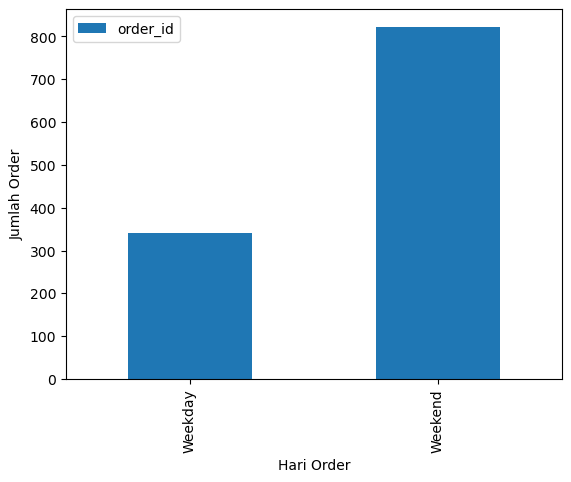

In [135]:
compare_day.plot(kind='bar')
plt.xlabel('Hari Order') #Judul sumbu x
plt.ylabel('Jumlah Order') #Judul sumbu y
plt.show() #Menampilkan plot

**Notes:**

Berdasarkan output di atas, jumlah order jauh lebih banyak pada saat *weekend* ketimbang saat *weekday*. Meskipun demikian, rata-rata *delivery time* untuk *weekend* masih lebih cepat. Karena kurangnya data, asumsi dari saya adalah sebagai berikut:

1. Armada yang di-*deploy* saat *weekend* lebih banyak dari armada untuk *weekday*.
2. *Multiple order* dalam satu restoran yang sama bisa terjadi karena ada kemungkinan *demand* yang lebih tinggi terhadap restoran pada saat *weekend* sehingga armada dapat membawa lebih dari satu *order* dalam sekali jalan.

**Key Takeaways:**
- Based on the results, we can conclude that the amount of orders is higher during the weekend. Despite that, the average delivery time is also faster during the weekend compared to weekdays. These are the assumptions on what might be the cause:
1. There are more fleet during the weekend.
2. Multiple orders might be the reasons on why the average delivery time during the weekend is faster.

### **Explore `rating`**

In [136]:
# Max & Min
print(f'Max rating: {df_new['rating'].max():.0f}')
print(f'Min rating: {df_new['rating'].min():.0f}')

# Rata - Rata
print(f'AVG rating: {df_new['rating'].mean():.0f}')

# Median
print(f'Median rating: {df_new['rating'].median():.0f}')

# Modus
print(f'Modus rating: {df_new['rating'].mode().values[0]:.0f}')

#Standar Deviasi
std = df_new['rating'].std()
print(f'Standar Deviasi: {std:.2f}')

#Skewness
print(f"Skewness: {df_new['rating'].skew():.2f}")

#Kurtosis
print(f"Kurtosis: {df_new['rating'].kurtosis():.2f}")

Max rating: 5
Min rating: 3
AVG rating: 4
Median rating: 5
Modus rating: 5
Standar Deviasi: 0.74
Skewness: -0.65
Kurtosis: -0.92


<Axes: >

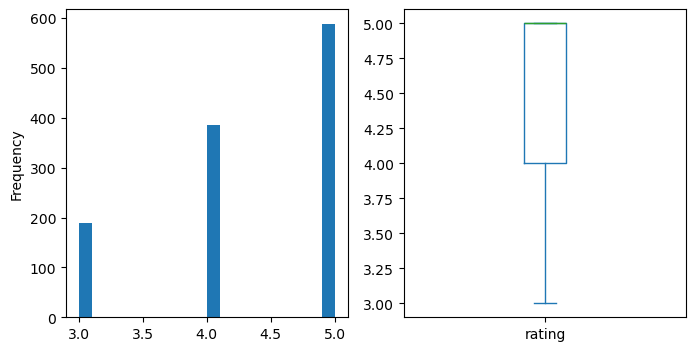

In [137]:
fig, ax = plt.subplots(ncols=2,figsize=(8,4))

df_new['rating'].plot(kind='hist',bins=20,ax=ax[0]) #Plot histogram
df_new['rating'].plot(kind='box',ax=ax[1]) #Plot Box and Whisker

**Notes:**
- *Range* rating dari **3** hingga **5**.
- Nilai mean < median & modus yang menandakan bahwa pola distribusinya tergolong ke "***negative skew***". Hal ini tergambarkan pada plot histogram di atas.
- Pada plot box di atas tidak terlihat indikasi bahwa data memiliki *outlier*.
- Nilai *skewness* **(-0.65)** berada di antara -0.5 dan -1.0 yang artinya distribusi data masuk ke kategori "***moderately skewed***".
- Nilai *kurtosis* **(-0.92)** berada di bawah 0 yang artinya distribusi data masuk ke kategori "***platykurtic***".

**Key Notes:**
- The value of `rating` varies between 3 and 5.
- The value of mean is lower than median and mode which indicates a `negative skew` on the data distribution. This is also depicted by the skewness value (-0.65).
- The kurtosis value (-0.92) indicates that the data distribution is `platykurtic`.
- The box plot indicates that there are `no outliers`.

#### **1. `rating` vs `food_preparation_time`**

In [ ]:
df_f = df_new[['rating', 'food_preparation_time', 'delivery_time']]

df_f

,rating,food_preparation_time,delivery_time
2,5.0,23,28
3,3.0,25,15
4,4.0,25,24
5,3.0,20,24
7,3.0,33,30
...,...,...,...
1889,3.0,33,30
1890,5.0,20,22
1893,5.0,31,17
1894,5.0,31,19


In [ ]:
rating_prep_time = df_f.groupby(df_f['rating']).mean()
rating_prep_time

,food_preparation_time,delivery_time
rating,,
3.0,27.430851,24.558511
4.0,27.396373,23.867876
5.0,27.355442,24.212585


**Note:**
- There is no significant difference in average delivery and food prep time between each rating.

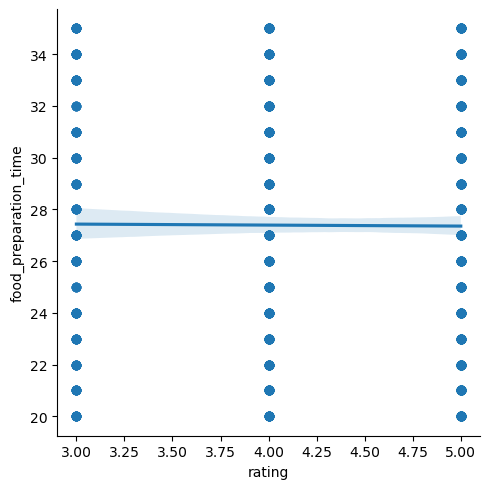

In [140]:
sns.lmplot(data=df_f,x='rating', y='food_preparation_time')

**Key Takeaways:**
- The regression line is slightly tilted downwards which indicates a small negative correlation.

Next, we're going to do a hypothesis testing and correlation analysis.

**Hypothesis:**
- **H0**: There is no correlation between `food_preparation_time` and `rating`
- **H1**: There is a correlation between `food_preparation_time` and `rating`

In [141]:
corr_tau, pval_k = stats.kendalltau(df_f['food_preparation_time'], df_f['rating'])

print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: -0.01, p-value: 0.8174202296505915


**Conclusion:**
- The correlation value (-0.01) indicates that there is a small negative correlation.
- P-value (0.82) is higher than the critical value (0.05) which means that H0 is accepted.

#### **2. `cost_of_the_order` vs `rating`**

In [ ]:
df_g = df_new[['cost_of_the_order', 'rating']] 

df_g 

,cost_of_the_order,rating
2,12.23,5.0
3,29.20,3.0
4,11.59,4.0
5,25.22,3.0
7,5.97,3.0
...,...,...
1889,8.68,3.0
1890,15.67,5.0
1893,22.31,5.0
1894,12.18,5.0


In [ ]:
rating_harga = df_g.groupby(df_g['rating']).mean()
rating_harga

,cost_of_the_order
rating,
3.0,16.223351
4.0,16.710337
5.0,16.965697


**Note:**
- There is no significant difference in cost between the ratings.

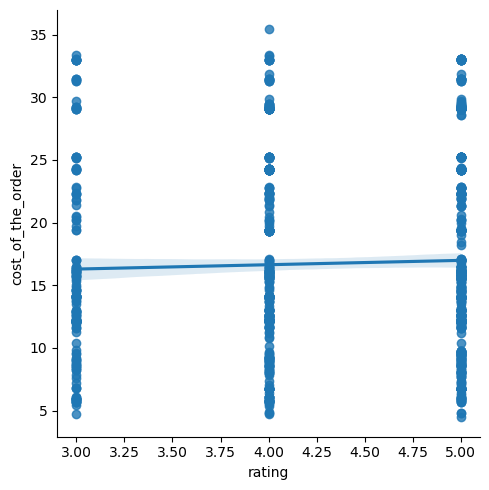

In [144]:
sns.lmplot(data=df_g,x='rating', y='cost_of_the_order')

**Key Takeaways:**
- Based on the scatter chart, the distribution of cost between the ratings is quite balanced.
- The majority cost of most orders are below $20.
- The regression line is slightly tilted upwards which indicates a positive correlation.

Next, we're going to do a hypothesis testing and correlation analysis.

**Hypothesis:**
- **H0**: There is no correlation between `cost_of_the_order` and `rating`
- **H1**: There is a correlation between `cost_of_the_order` and `rating`

In [145]:
corr_tau, pval_k = stats.kendalltau(df_g['cost_of_the_order'], df_g['rating'])

print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: 0.03, p-value: 0.19202765076620154


**Conclusion:**
- The correlation value (0.03) indicates a relatively weak positive correlation.
- P-value (0.19) is higher than the critical value (0.05) which means that H0 is accepted.

#### **3. `cuisine_type` vs `rating`**

In [ ]:
df_h = df_new[['cuisine_type', 'rating']] 

df_h 

,cuisine_type,rating
2,Mexican,5.0
3,American,3.0
4,American,4.0
5,Indian,3.0
7,Mediterranean,3.0
...,...,...
1889,Chinese,3.0
1890,Japanese,5.0
1893,Mexican,5.0
1894,American,5.0


Next we're going to do hypothesis testing and correlation analysis using Chi-Squared method since both features are categorical.

**Hypothesis:**
- **H0**: There is no correlation between `cuisine_type` and `rating`
- **H1**: There is a correlation between `cuisine_type` and `rating`

In [147]:
#Contingency Table
contingency_table = pd.crosstab(df_h['cuisine_type'],df_h['rating'])
contingency_table

rating,3.0,4.0,5.0
cuisine_type,,,
American,64,130,174
Chinese,24,40,69
French,2,3,5
Indian,5,13,32
Italian,28,54,90
Japanese,40,91,142
Korean,2,4,3
Mediterranean,9,7,16
Mexican,6,16,26


In [148]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue) 

P-value: 0.5141366637771746


**Kesimpulan:**

- Berdasarkan perhitungan di atas didapatkan nilai ***p-value* (0.51)** lebih besar dari *critical value* (0.05). Dengan demikian, **H0 diterima**.
- Kesimpulan akhirnya adalah **tidak ada korelasi** antara **`cuisine_type`** dengan **`rating`**.

**Conclusion:**
- P-value (0.51) is higher than the critical value (0.05) which means that H0 is accepted.
- There is no correlation between the two features.

## **6. Conclusion**

### **Insight Summary**

**Problem Statement**

1. The rating column has no correlation with delivery_time.
    - Since the two variables are not correlated, improving the rating cannot be achieved by focusing only on improving delivery time. Many other variables need to be considered.

**Regarding Delivery Time**

1. Vietnamese restaurants have the longest average delivery time (27.2 minutes), while Korean restaurants have the fastest average delivery time (21.11 minutes).
2. The order_id column has no correlation with delivery_time.
    - The number of orders received by a restaurant does not correlate with delivery time. This is evident from the four types of restaurants that dominate in terms of order volume — American, Japanese, Chinese, and Italian — all of which received more than 100 orders. However, the longest delivery time is held by Vietnamese restaurants, which only received 5 orders.
3. The food_preparation_time column has no correlation with delivery_time.
    - These two variables are rightly uncorrelated since food preparation time is the responsibility of each individual restaurant.
4. The number of orders during weekends (822) is higher than during weekdays (340). However, the average delivery time on weekends (22.44 minutes) is faster than on weekdays (28.3 minutes). Possible reasons for this include:
    - More delivery fleet is deployed during weekends compared to weekdays.
    - Multiple orders from the same restaurant may occur due to higher demand on weekends, allowing delivery agents to carry more than one order at a time.

**Regarding Rating**

1. The food_preparation_time column has no correlation with the rating column.
    - Since the duration of food preparation does not affect rating, this should not be an issue as it is beyond the control of Foodhub as the delivery service provider.
2. The price column has no correlation with rating.
    - It is assumed that the order price includes both the delivery fee and the food price. If the price paid by the consumer does not correlate with rating, it can be concluded that Foodhub’s customers have a low level of price sensitivity.
3. The cuisine_type column has no correlation with rating.
    - If the type of restaurant does not guarantee a higher rating, it can be said that the tastes of Foodhub’s consumers are highly diverse.

### **Recommendation**

1. Management between weekdays and weekends.
    - Delivery time on weekdays can still be improved by increasing the number of delivery personnel, especially in areas that are likely to be busy during weekdays, such as office districts. Another strategy could be offering limited-time discount vouchers to encourage consumers to place orders during typically low-demand hours. Since weekdays make up a large portion of the week (5 out of 7 days), this potential should not be overlooked.
    - Currently, weekends can be considered prime time for Foodhub. Therefore, it is important to maintain this momentum to avoid losing potential revenue. This can be done by ensuring adequate delivery fleet availability. In fact, the solutions for weekdays can also be leveraged during weekends.

2. Build relationships with "pareto" restaurants.
    - There are four types of restaurants that dominate in terms of the number of orders: American, Japanese, Chinese, and Italian. To sustain transactions from these restaurant types, collaborations can be established. This could include running promotional campaigns or integrating systems that facilitate smoother order processing between the restaurants and Foodhub’s delivery fleet.

